In [36]:
import sys
# import sibling folder
sys.path.append("..")

In [37]:
import os
import numpy as np
import pandas as pd
from llama_cpp import Llama

import experiments.utils as utils
from pprint import pprint
from IPython.display import display_markdown

In [38]:
!pwd

/Users/mahat/Desktop/Dev/JB_Project/sentiment-analysis/notebooks


In [39]:
plots_base_path = '../docs/plots/experiments/few_shot'

In [40]:
# init datasets
valid_ds_mini, valid_ds_small, incontext_ds_small, valid_ds_big, incontext_ds_big = utils.load_ds()

# model names
small_model_repo_id="bartowski/Qwen2.5-0.5B-Instruct-GGUF"
small_model_file_name="Qwen2.5-0.5B-Instruct-IQ2_M.gguf"

big_model_repo_id="bartowski/Qwen2.5-1.5B-Instruct-GGUF"
big_model_file_name="Qwen2.5-1.5B-Instruct-IQ2_M.gguf"

test_ds = utils.load_test()

## Few Shot Prompt 

In [41]:
from experiments.few_shot_experiment import FewShotExperiment
# increasing n_ctx for bigger few shots
few_shot_exp  = FewShotExperiment(small_model_repo_id, small_model_file_name, n_ctx=1024*5, valid_ds=valid_ds_mini,incoxtext_examples=incontext_ds_small, pass_k=5)
display_markdown(f"### System and User Prompts", raw=True)
display_markdown(f"**System Prompt**: {few_shot_exp.system_prompt}", raw=True)
display_markdown(f"**User Prompt**: {few_shot_exp.user_prompt}", raw=True)

llama_init_from_model: n_ctx_per_seq (5120) < n_ctx_train (32768) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_b

### System and User Prompts

**System Prompt**: You are a helpful large language model that understands sentiment of a movie review. Examples are provided inside <examples>...</examples> tags as list items <li>...</li> to help you to decide.
Your final answer must be either Negative or Positive based on the sentiment of the review.

**User Prompt**: <examples>
{inContext}
</examples>
Review: {query} Final Answer:

llama_init_from_model: n_ctx_per_seq (5120) < n_ctx_train (32768) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_b

{'accuracy': 0.6614173228346457,
 'confusion_matrix': array([[62,  1],
       [42, 22]]),
 'f1_score': 0.5057471264367817,
 'precision': 0.9565217391304348,
 'recall': 0.34375,
 'valid_answer_ratio': np.float64(0.9921875)}


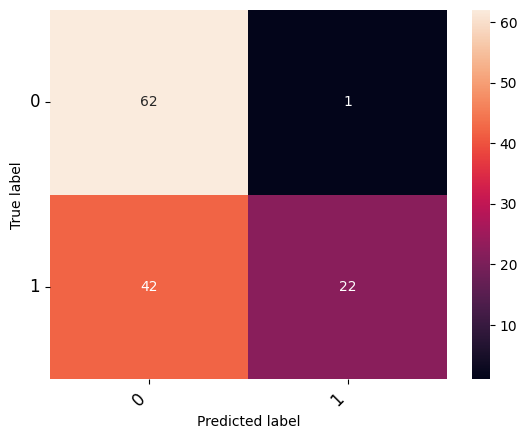

In [42]:
few_shot_exp_5 = FewShotExperiment(small_model_repo_id, small_model_file_name, n_ctx=1024*5, valid_ds=valid_ds_small,incoxtext_examples=incontext_ds_small, pass_k=5)
few_shot_eval_5 = few_shot_exp_5().eval()
pprint(few_shot_eval_5)
small_model_cm_fig_5=utils.plot_cm(few_shot_eval_5['confusion_matrix'])
small_model_cm_fig_5.savefig(f'{plots_base_path}/cm_5_default.png')

llama_init_from_model: n_ctx_per_seq (6144) < n_ctx_train (32768) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_b

{'accuracy': 0.53125,
 'confusion_matrix': array([[64,  0],
       [60,  4]]),
 'f1_score': 0.11764705882352941,
 'precision': 1.0,
 'recall': 0.0625,
 'valid_answer_ratio': np.float64(1.0)}


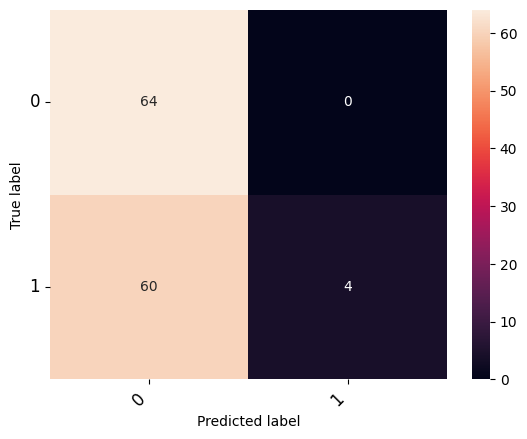

In [43]:
# increase pass k
few_shot_exp_10 = FewShotExperiment(small_model_repo_id, small_model_file_name, n_ctx=1024*6, valid_ds=valid_ds_small,incoxtext_examples=incontext_ds_small, pass_k=10)
few_shot_eval_10 = few_shot_exp_10().eval()
pprint(few_shot_eval_10)
small_model_cm_fig_10=utils.plot_cm(few_shot_eval_10['confusion_matrix'])
small_model_cm_fig_10.savefig(f'{plots_base_path}/cm_10_default.png')

In [44]:
# peek generations
few_shot_exp_5.get_run_log()[-10]

{'system_promt': 'You are a helpful large language model that understands sentiment of a movie review. Examples are provided inside <examples>...</examples> tags as list items <li>...</li> to help you to decide.\nYour final answer must be either Negative or Positive based on the sentiment of the review.',
 'user_prompt': "<examples>\n<li>\nReview: the film released at the start of 2000 alongwith mela both disasters so sad to start a millennium with such nonsensethe film seems to suit 70's but looks like an unintentional comedy for 2000anywayz some classic gems from the film: paresh rawal i don't understand to laugh at his role or cry reason: he goes searching his mother in the village worst part is when he realises a secret of anil he keeps the secret in his stomach which becomes big and makes him look pregnant i remember in my childhood my teacher told me the same joke urrf!!!! as a child i laughed at it that time but here?the whole film is a joke can't explain we have anil in a dual 

In [45]:
# few_shot_exp_5.get_run_log()[-10]['response']['choices'][0]['message']['content']

In [ ]:
# tune bias
few_shot_exp_5.llm.tokenize('Positive'.encode(encoding="utf-8"),add_bos=True)

[35490]

In [47]:
few_shot_exp_5_debias = FewShotExperiment(small_model_repo_id, small_model_file_name, n_ctx=1024*8, valid_ds=valid_ds_mini,incoxtext_examples=incontext_ds_small, pass_k=5)
# start with higher temp and fine tune it later
few_shot_exp_5_debias.temperature = 0.5
for b in [-750,-500,-300,-100,0]: #
    few_shot_exp_5_debias.logit_bias = {35490:b}
    few_shot_eval_5_debias = few_shot_exp_5_debias().eval()
    print(b,few_shot_eval_5_debias['f1_score'],few_shot_eval_5_debias['valid_answer_ratio'])
    pprint(few_shot_eval_5_debias['confusion_matrix'])

llama_init_from_model: n_ctx_per_seq (8192) < n_ctx_train (32768) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_b

-750 0.8125 0.828125
array([[15,  9],
       [ 3, 26]])


running validation set: 100%|██████████| 64/64 [02:48<00:00,  2.63s/it]


-500 0.7647058823529411 0.9375
array([[18, 12],
       [ 4, 26]])


running validation set: 100%|██████████| 64/64 [02:37<00:00,  2.46s/it]


-300 0.7586206896551724 0.84375
array([[18, 10],
       [ 4, 22]])


running validation set: 100%|██████████| 64/64 [02:39<00:00,  2.49s/it]


-100 0.7666666666666667 0.859375
array([[18,  8],
       [ 6, 23]])


running validation set: 100%|██████████| 64/64 [02:25<00:00,  2.27s/it]

0 0.6923076923076923 0.984375
array([[29,  2],
       [14, 18]])


In [ ]:
# set best bias 
few_shot_exp_5_debias.logit_bias = {35490:-100}

### Hyper params

0.2


running validation set: 100%|██████████| 64/64 [02:32<00:00,  2.38s/it]


0.3


running validation set: 100%|██████████| 64/64 [02:34<00:00,  2.41s/it]


0.5


running validation set: 100%|██████████| 64/64 [02:28<00:00,  2.33s/it]


0.8


running validation set: 100%|██████████| 64/64 [02:53<00:00,  2.71s/it]


1.0


running validation set: 100%|██████████| 64/64 [02:47<00:00,  2.62s/it]


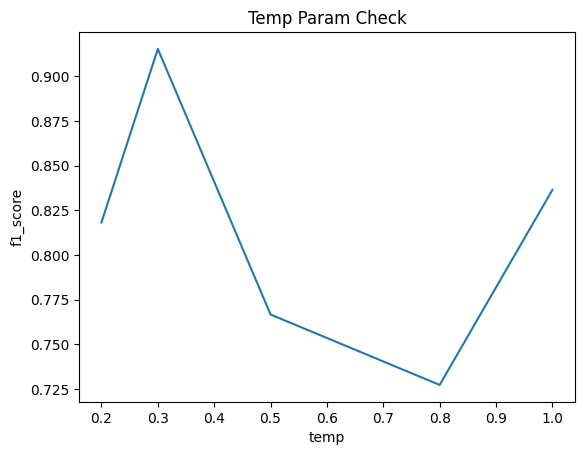

In [49]:
# few_shot_exp_5_debias = FewShotExperiment(small_model_repo_id, small_model_file_name, n_ctx=1024*8, valid_ds=valid_ds_mini,incoxtext_examples=incontext_ds_small, pass_k=5)
few_shot_exp_5_debias.logit_bias = {35490:-100}
few_shot_exp  = few_shot_exp_5_debias # FewShotExperiment(small_model_repo_id, small_model_file_name, n_ctx=1024*5, valid_ds=valid_ds_mini,incoxtext_examples=incontext_ds_small, pass_k=5)
metric_fs_temp = utils.temp_check_helper(few_shot_exp,trange=[0.2,0.3,0.5,0.8,1.0])
fig_temp = utils.plot_metrics(metric_fs_temp,x_key='temp',y_key='f1_score',title='Temp Param Check')
fig_temp.savefig(f'{plots_base_path}/temp_param_plot_k_5_debias.png')

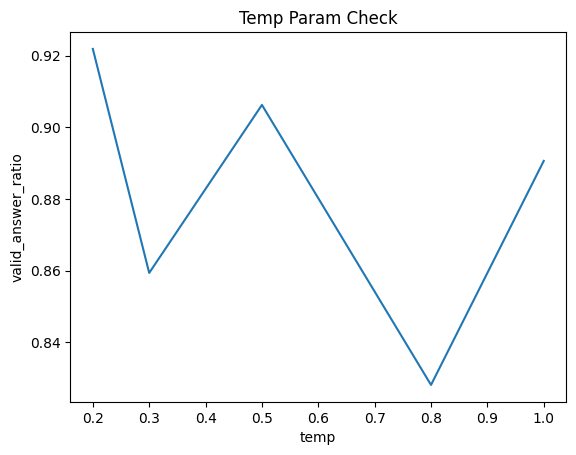

In [50]:
fig_temp_var = utils.plot_metrics(metric_fs_temp,x_key='temp',y_key='valid_answer_ratio',title='Temp Param Check')

llama_init_from_model: n_ctx_per_seq (8192) < n_ctx_train (32768) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_b

{'accuracy': 0.7973568281938326,
 'confusion_matrix': array([[100,  35],
       [ 11,  81]]),
 'f1_score': 0.7788461538461539,
 'precision': 0.6982758620689655,
 'recall': 0.8804347826086957,
 'valid_answer_ratio': np.float64(0.88671875)}


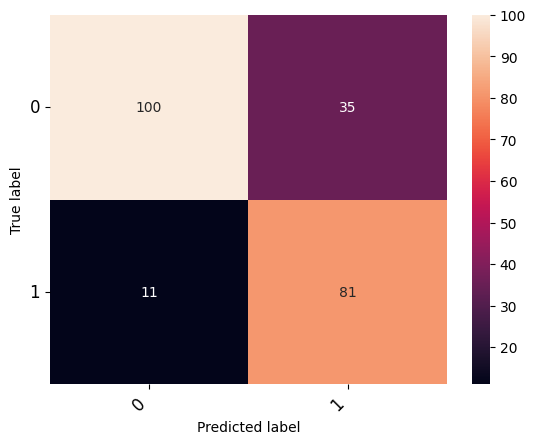

In [53]:
# final Valid
few_shot_exp_5_debias = FewShotExperiment(small_model_repo_id, small_model_file_name, n_ctx=1024*8, valid_ds=test_ds,incoxtext_examples=incontext_ds_small, pass_k=5)
few_shot_exp_5_debias.temperature = 0.3
few_shot_exp_5_debias.min_p = 0.05
few_shot_exp_5_debias.logit_bias = {35490:-100}
few_shot_eval_test = few_shot_exp_5_debias().eval()
pprint(few_shot_eval_test)
fig_valid_big=utils.plot_cm(few_shot_eval_test['confusion_matrix'])
fig_valid_big.savefig(f'{plots_base_path}/cm_10_test.png')